
# **Часть 1. Линейная регрессия**


Датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

Для приведенного выше датасета, построить модель линейной регрессии для оценивания стоимости аренды недвижимости. Для решения задачи предлагается использовать следующие подходы:

1. Получить решение задачи в замкнутом виде с помощью псевдообратной матрицы Рассмотреть случаи без регуляризации и с 𝐿 регуляризацией.

2. Получить решение задачи методом градиентного спуска. Получить формулу для градиента, используя матрицу признаков. Сравнить полученные решение с п.1.

При решении задачи необходимо ответить на следующие вопросы:

1. Какие признаки оказывают наибольший вклад в точность определения стоимости аренды? Предложить способы отбора наиболее важных признаков

2. Какая модель имеет наименьшее значение функции потерь на тестовой выборке? Помогает ли регуляризация избежать эффекта переобучения в данном примере?

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [61]:
file_path = '/content/drive/MyDrive/Ex1/'
df = pd.read_csv(file_path + "House_Rent_Dataset.csv")

# **Обработка данных**

In [62]:
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')
df.head()


Number of rows and columns in the data set:  (4746, 12)



,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


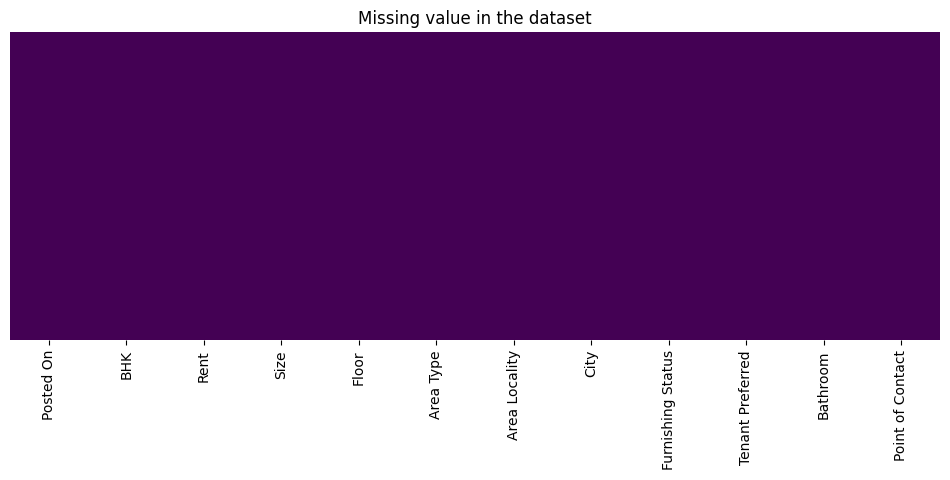

In [64]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [65]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [66]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [67]:
df.duplicated().sum()

0

In [68]:
df["Area Locality"].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [69]:
df["Area Locality"].nunique()

2235

In [70]:
df = df.drop("Area Locality",axis = 1)

In [71]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [72]:
df['Posted On'] = df['Posted On'].str.split('-').str[1]

In [73]:
df["Floor Number"]=df["Floor"].apply(lambda x:str(x).split()[0])
df["Total Floor"]=df["Floor"].apply(lambda x:str(x).split()[-1])
del df["Floor"]
df["Floor Number"] = df["Floor Number"].replace(['Ground'],"0")
df["Floor Number"] = df["Floor Number"].replace(['Lower'],"-2")
df["Floor Number"] = df["Floor Number"].replace(['Upper'],"-1")
df["Total Floor"] = df["Total Floor"].replace(['Ground'],"0")

In [74]:
unique_FloorNum = df["Floor Number"].unique()
print(unique_FloorNum)

['0' '1' '2' '4' '3' '5' '7' '8' '-1' '11' '-2' '6' '14' '43' '13' '18'
 '17' '9' '19' '60' '34' '12' '26' '25' '53' '16' '10' '39' '32' '47' '28'
 '20' '15' '65' '40' '37' '22' '21' '30' '35' '33' '44' '41' '46' '27'
 '45' '48' '50' '24' '23' '29' '49' '36' '76']


In [75]:
unique_TTFloor = df["Total Floor"].unique()
print(unique_TTFloor)

['2' '3' '1' '4' '5' '14' '8' '6' '19' '10' '7' '13' '78' '18' '12' '24'
 '31' '21' '23' '20' '9' '22' '58' '16' '66' '48' '40' '44' '42' '41' '60'
 '32' '30' '29' '89' '15' '11' '28' '17' '45' '35' '75' '38' '51' '43'
 '25' '27' '26' '76' '36' '37' '55' '68' '77' '50' '59' '62' '39' '52'
 '54' '33' '46' '85' '71' '81' '34' '0']


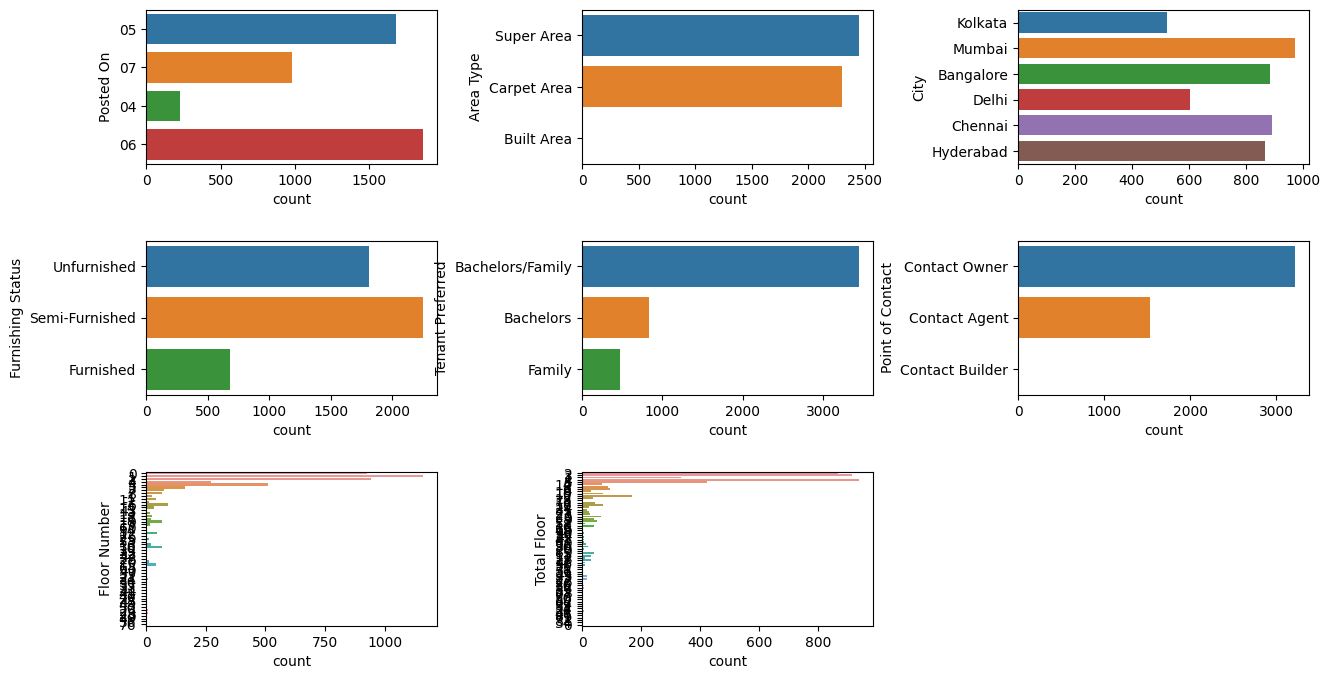

In [76]:
plt.figure(figsize=(15,8))

for index,column in enumerate(df.select_dtypes(exclude=np.number)):
    plt.subplot(3,3,index+1)
    sns.countplot(data=df,y=column)

plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [77]:
df  = df[df["Area Type"] != "Built Area"]
df = df[df["Point of Contact"] != "Contact Builder"]

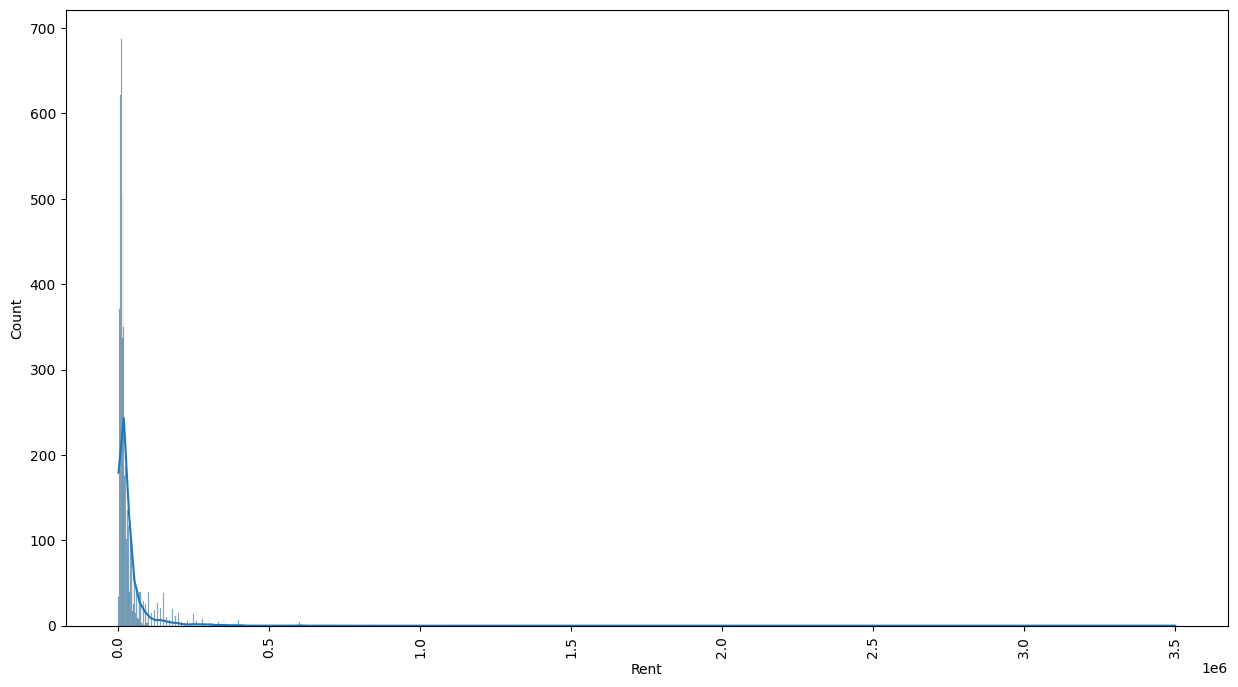

In [78]:
plt.figure(figsize=(15,8))
sns.histplot(data = df,x = "Rent",kde=True)
plt.xticks(rotation = 90)
plt.show()

In [79]:
log_rent = np.log(df.Rent)

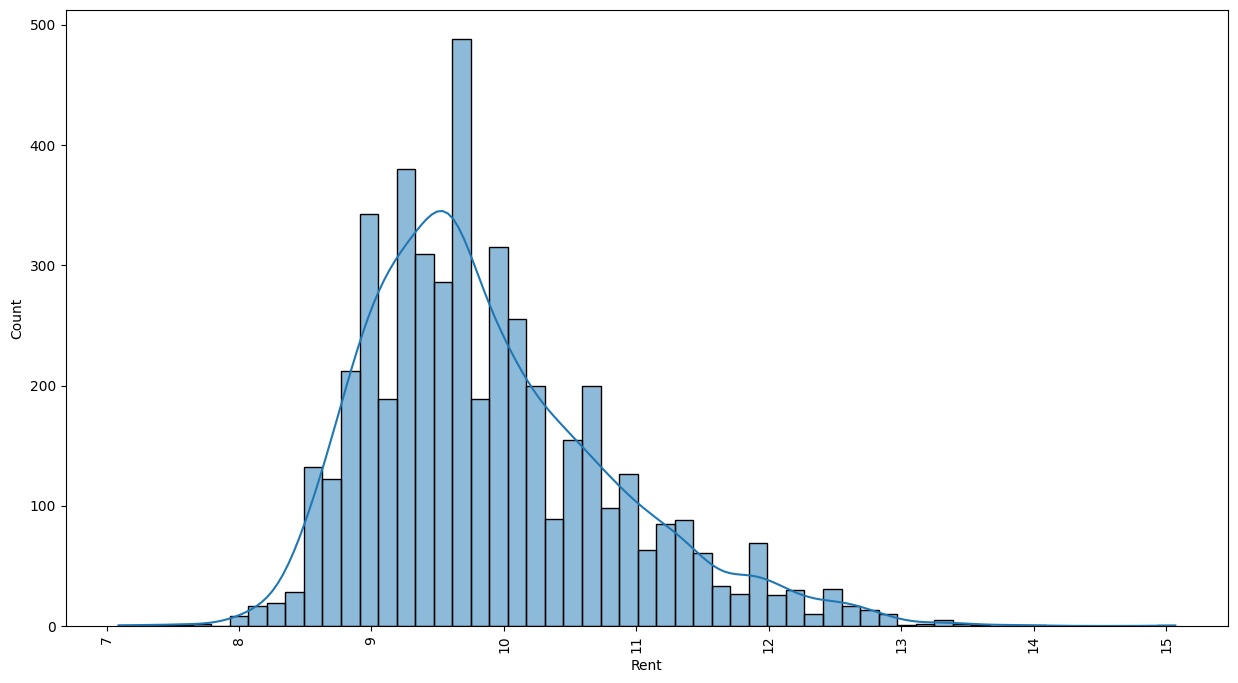

In [80]:
plt.figure(figsize=(15,8))
sns.histplot(data = log_rent, kde=True)
plt.xticks(rotation = 90)
plt.show()

In [81]:
df["Floor Number"] = df["Floor Number"].astype("int64")
df["Total Floor"] = df["Total Floor"].astype("int64")
df["Posted On"] = df["Posted On"].astype("int64")

In [82]:
df.dtypes

Posted On             int64
BHK                   int64
Rent                  int64
Size                  int64
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
Floor Number          int64
Total Floor           int64
dtype: object

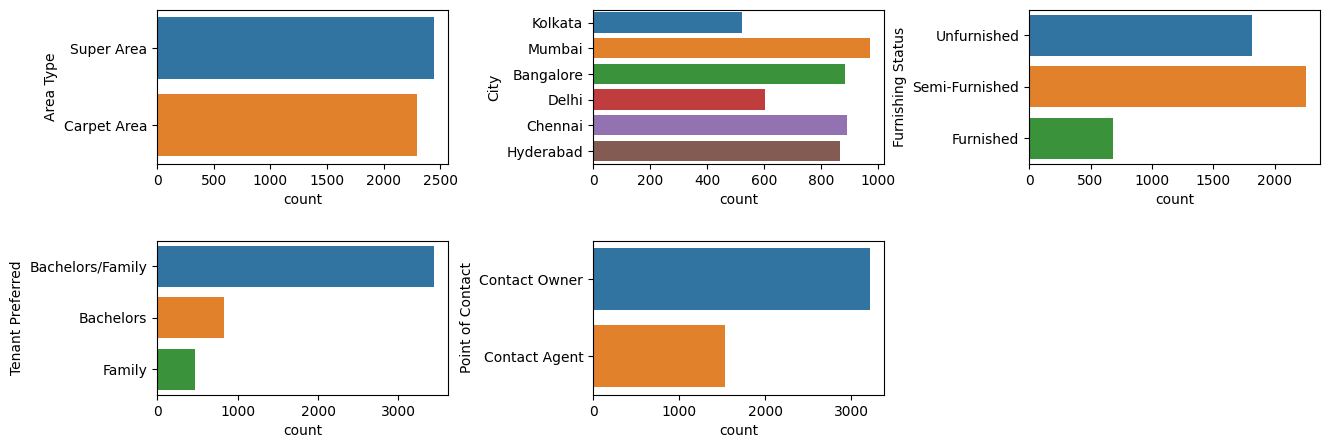

In [83]:
plt.figure(figsize=(15,8))

for index,column in enumerate(df.select_dtypes(exclude=np.number)):
    plt.subplot(3,3,index+1)
    sns.countplot(data=df,y=column)

plt.subplots_adjust(wspace=0.5,hspace=0.5)

<ipython-input-84-aeada03e9275>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

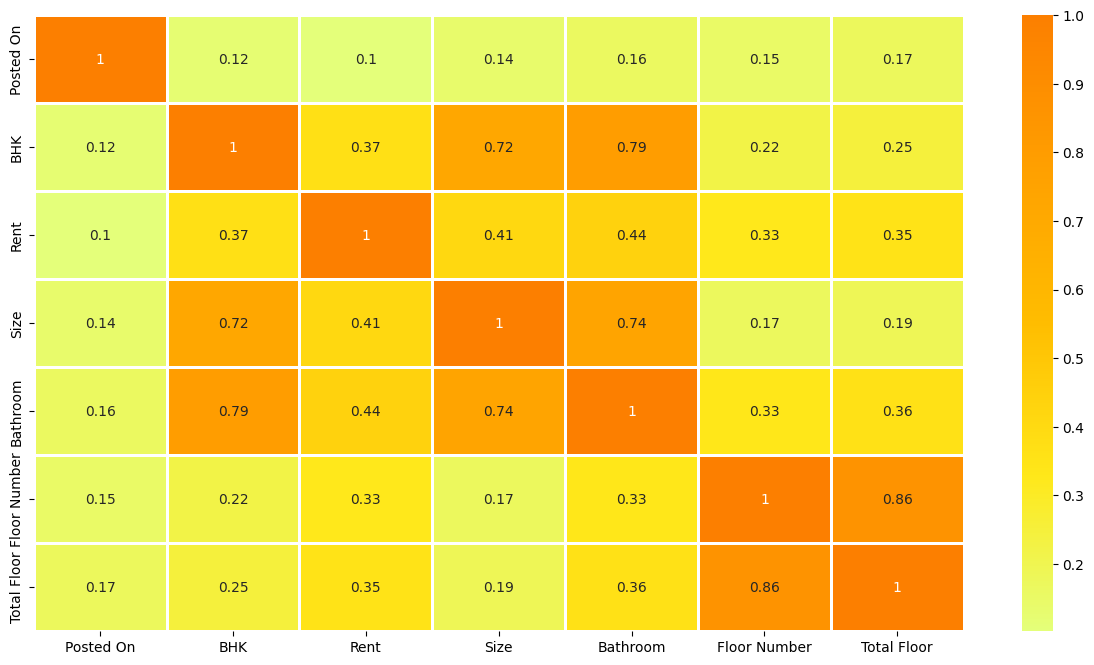

In [84]:
correlation = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation,cmap = 'Wistia', lw = 1, annot = True)

In [85]:
correlation[["Rent"]]

,Rent
Posted On,0.101994
BHK,0.369653
Rent,1.000000
Size,0.413498
Bathroom,0.441172
Floor Number,0.326191
Total Floor,0.352216


In [86]:
df.drop("BHK",axis = 1,inplace = True)
df.drop("Floor Number",axis = 1,inplace = True)

<ipython-input-87-aeada03e9275>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

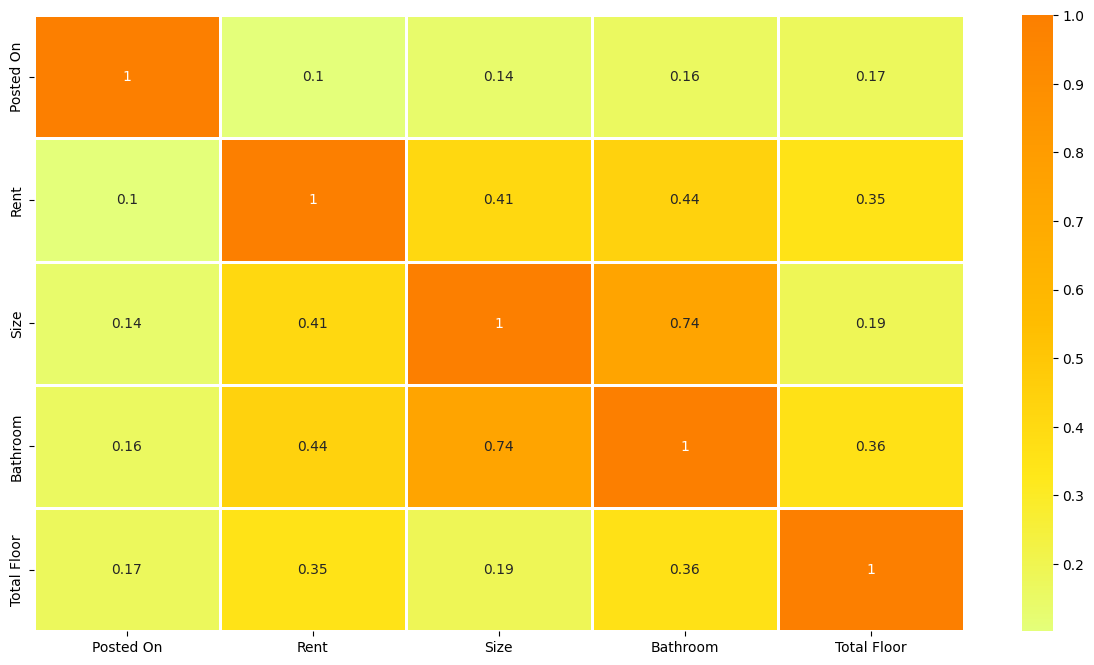

In [87]:
correlation = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation,cmap = 'Wistia', lw = 1, annot = True)

In [88]:
x = df

In [89]:
# Dummy variable
categorical_columns = ['Area Type',	'City',	'Furnishing Status',	'Tenant Preferred',	'Point of Contact']
x = pd.get_dummies(data = x, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [90]:
x.head()

,Posted On,Rent,Size,Bathroom,Total Floor,OHE_Super Area,OHE_Chennai,OHE_Delhi,OHE_Hyderabad,OHE_Kolkata,OHE_Mumbai,OHE_Semi-Furnished,OHE_Unfurnished,OHE_Bachelors/Family,OHE_Family,OHE_Contact Owner
0,5,10000,1100,2,2,1,0,0,0,1,0,0,1,1,0,1
1,5,20000,800,1,3,1,0,0,0,1,0,1,0,1,0,1
2,5,17000,1000,1,3,1,0,0,0,1,0,1,0,1,0,1
3,7,10000,800,1,2,1,0,0,0,1,0,0,1,1,0,1
4,5,7500,850,1,2,0,0,0,0,1,0,0,1,0,0,1


In [91]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',x.columns.values)
print('\nNumber of rows and columns in the dataset:',x.shape)

Columns in original data frame:
 ['Posted On' 'Rent' 'Size' 'Area Type' 'City' 'Furnishing Status'
 'Tenant Preferred' 'Bathroom' 'Point of Contact' 'Total Floor']

Number of rows and columns in the dataset: (4743, 10)

Columns in data frame after encoding dummy variable:
 ['Posted On' 'Rent' 'Size' 'Bathroom' 'Total Floor' 'OHE_Super Area'
 'OHE_Chennai' 'OHE_Delhi' 'OHE_Hyderabad' 'OHE_Kolkata' 'OHE_Mumbai'
 'OHE_Semi-Furnished' 'OHE_Unfurnished' 'OHE_Bachelors/Family'
 'OHE_Family' 'OHE_Contact Owner']

Number of rows and columns in the dataset: (4743, 16)


In [92]:
# from scipy.stats import boxcox
# y_bc,lam, ci= boxcox(x["Rent"],alpha=0.05)

# x["Rent"] = y_bc
# # it did not perform better for this model, so log transform is used
# ci,lam

x["Rent"] = np.log(x["Rent"])

In [93]:
x.head()

,Posted On,Rent,Size,Bathroom,Total Floor,OHE_Super Area,OHE_Chennai,OHE_Delhi,OHE_Hyderabad,OHE_Kolkata,OHE_Mumbai,OHE_Semi-Furnished,OHE_Unfurnished,OHE_Bachelors/Family,OHE_Family,OHE_Contact Owner
0,5,9.210340,1100,2,2,1,0,0,0,1,0,0,1,1,0,1
1,5,9.903488,800,1,3,1,0,0,0,1,0,1,0,1,0,1
2,5,9.740969,1000,1,3,1,0,0,0,1,0,1,0,1,0,1
3,7,9.210340,800,1,2,1,0,0,0,1,0,0,1,1,0,1
4,5,8.922658,850,1,2,0,0,0,0,1,0,0,1,0,0,1


<Axes: >

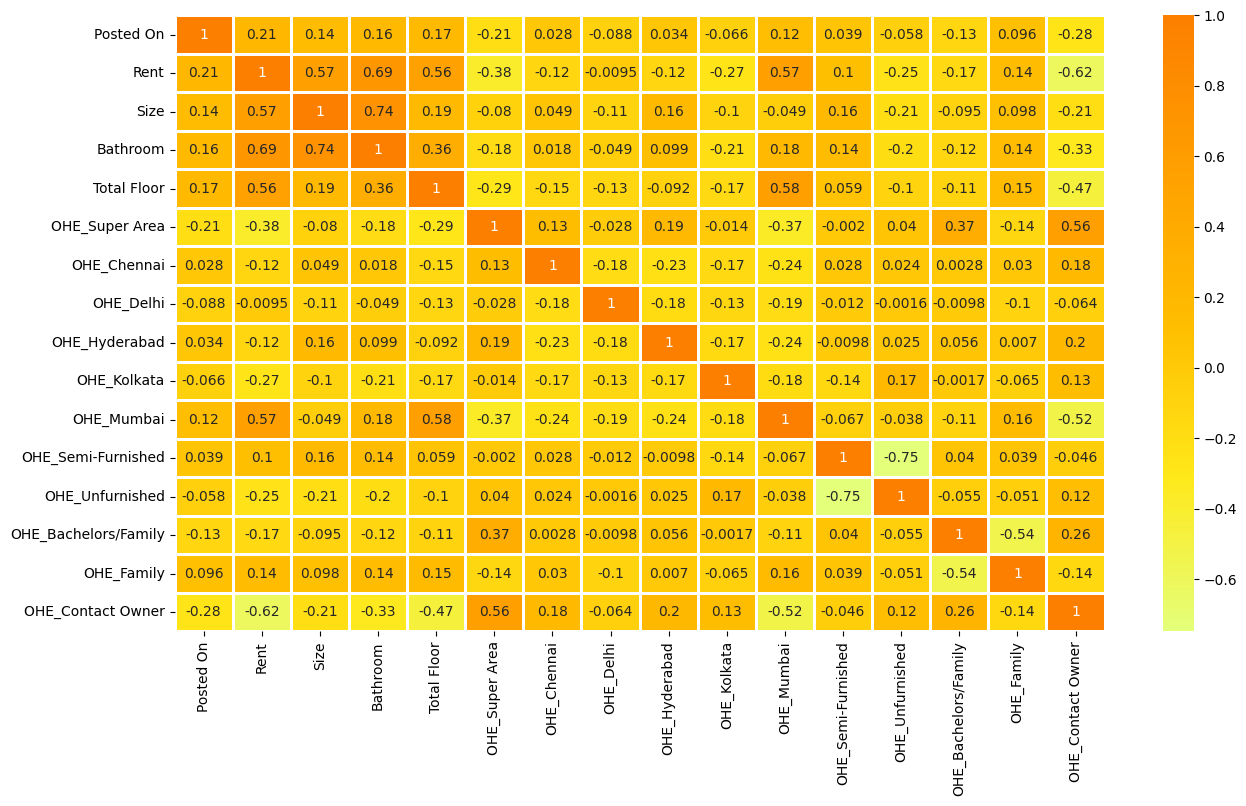

In [94]:
correlation = x.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation,cmap = 'Wistia', lw = 1, annot = True)

In [95]:
correlation[["Rent"]]

,Rent
Posted On,0.208690
Rent,1.000000
Size,0.567783
Bathroom,0.691924
Total Floor,0.555292
OHE_Super Area,-0.382981
OHE_Chennai,-0.119686
OHE_Delhi,-0.009533
OHE_Hyderabad,-0.122042
OHE_Kolkata,-0.273922


In [96]:
x = x.drop('OHE_Semi-Furnished',axis=1)

In [97]:
from sklearn.model_selection import train_test_split

y = x['Rent'] # dependent variable
x = x.drop('Rent',axis=1) # Independet variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

In [98]:
print('Columns in original data frame:\n',x.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',x.columns.values)
print('\nNumber of rows and columns in the dataset:',x.shape)

Columns in original data frame:
 ['Posted On' 'Size' 'Bathroom' 'Total Floor' 'OHE_Super Area'
 'OHE_Chennai' 'OHE_Delhi' 'OHE_Hyderabad' 'OHE_Kolkata' 'OHE_Mumbai'
 'OHE_Unfurnished' 'OHE_Bachelors/Family' 'OHE_Family' 'OHE_Contact Owner']

Number of rows and columns in the dataset: (4743, 10)

Columns in data frame after encoding dummy variable:
 ['Posted On' 'Size' 'Bathroom' 'Total Floor' 'OHE_Super Area'
 'OHE_Chennai' 'OHE_Delhi' 'OHE_Hyderabad' 'OHE_Kolkata' 'OHE_Mumbai'
 'OHE_Unfurnished' 'OHE_Bachelors/Family' 'OHE_Family' 'OHE_Contact Owner']

Number of rows and columns in the dataset: (4743, 14)


<Axes: >

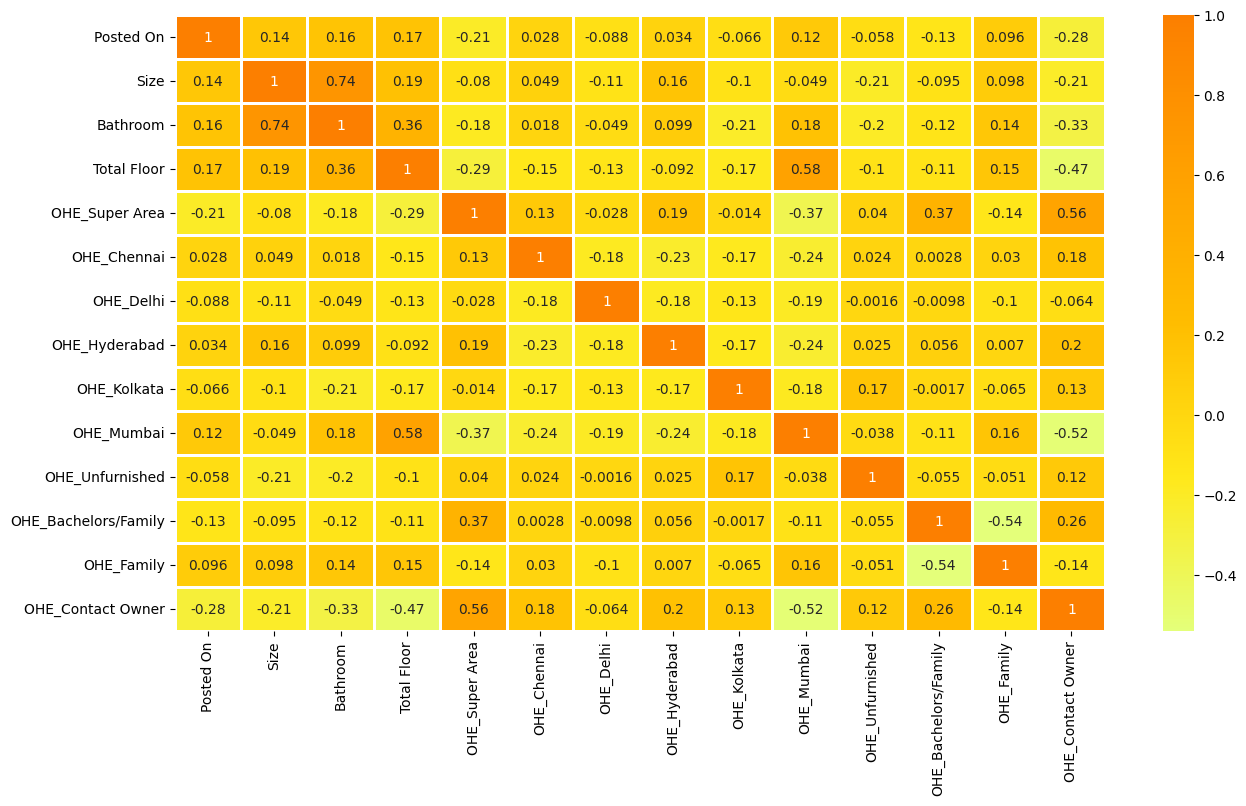

In [99]:
correlation = x.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation,cmap = 'Wistia', lw = 1, annot = True)

# **Регрессия без регуляризации**

## **Реализация вручную**

In [100]:
x_train_0 = np.c_[np.ones((x_train.shape[0],1)),x_train]
x_test_0 = np.c_[np.ones((x_test.shape[0],1)),x_test]

theta = np.matmul(np.linalg.inv( np.matmul(x_train_0.T,x_train_0) ), np.matmul(x_train_0.T,y_train))

In [101]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(x_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(x.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [102]:
# Normal equation
y_pred_norm =  np.matmul(x_test_0, theta)

#Evaluvation: MSE
J_mse_hndl = np.sum((y_pred_norm - y_test)**2)/ x_test_0.shape[0]

# R_square
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square_hndl = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_hndl)
print('R square obtain for normal equation method is :',R_square_hndl)

The Mean Square Error(MSE) or J(theta) is:  0.16198554782306776
R square obtain for normal equation method is : 0.8091590084986776


## **Реализация Sklearn**

In [103]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)

# Normal equation
y_pred_norm =  np.matmul(x_test_0, sk_theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ x_test_0.shape[0]

# R_square
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

The Mean Square Error(MSE) or J(theta) is:  0.16198554782306684
R square obtain for normal equation method is : 0.8091590084986787


,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,8.946610,8.946610
1,theta_1,Posted On,0.010147,0.010147
2,theta_2,Size,0.000493,0.000493
3,theta_3,Bathroom,0.278935,0.278935
4,theta_4,Total Floor,0.007205,0.007205
5,theta_5,OHE_Super Area,-0.059826,-0.059826
6,theta_6,OHE_Chennai,-0.013908,-0.013908
7,theta_7,OHE_Delhi,0.228627,0.228627
8,theta_8,OHE_Hyderabad,-0.157266,-0.157266
9,theta_9,OHE_Kolkata,-0.224044,-0.224044


# **Регрессия с L2 регуляризацией**

## **Реализация вручную**

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_L2 = scaler.fit_transform(x_train)
x_test_L2 = scaler.transform(x_test)

x_train_L2 = np.c_[np.ones((x_train.shape[0],1)),x_train_L2]
x_test_L2 = np.c_[np.ones((x_test.shape[0],1)),x_test_L2]

The Mean Square Error(MSE) or J(theta) is:  0.16197530639412439
R square obtain for normal equation method is : 0.8091710742939304


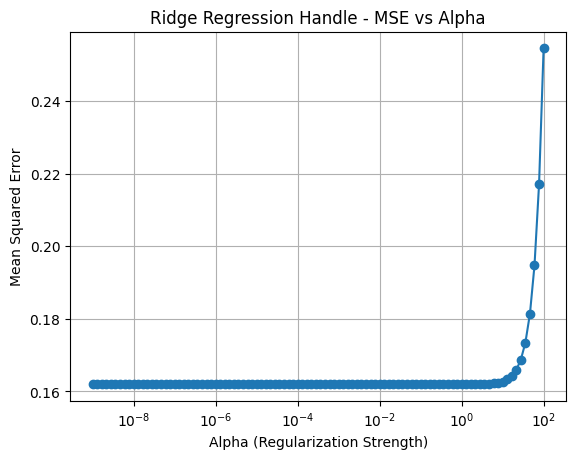

In [105]:
alphas = np.logspace(-9, 2, 100)  # различные значения коэффициента регуляризации

mse_values = []
R_square_values = []

for alpha in alphas:
    ridge_matrix = -alpha * np.eye(x_train.T.shape[0] + 1, k = -1)
    ridge_matrix[0, 0] = 0
    L2_coefs = np.matmul(np.linalg.inv(np.matmul(x_train_L2.T,x_train_L2) +  ridge_matrix), np.matmul(x_train_L2.T,y_train))

    # Normal equation
    y_pred_norm =  np.matmul(x_test_L2,L2_coefs)

    #Evaluvation: MSE
    J_mse = np.sum((y_pred_norm - y_test)**2)/ x_test_L2.shape[0]

    mse_values.append(J_mse)

    # R_square
    sse = np.sum((y_pred_norm - y_test)**2)
    sst = np.sum((y_test - y_test.mean())**2)
    R_square = 1 - (sse/sst)
    R_square_values.append(R_square)

J_mse_hndl_L2 = min(mse_values)
R_square_hndl_L2 = R_square_values[mse_values.index(min(mse_values))]

print('The Mean Square Error(MSE) or J(theta) is: ',min(mse_values))
print('R square obtain for normal equation method is :',R_square_values[mse_values.index(min(mse_values))])

plt.plot(alphas, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Handle - MSE vs Alpha')
plt.grid(True)
plt.show()

parameter_df = parameter_df.join(pd.Series(L2_coefs, name='theta_L2'))

## **Реализация Sklearn**

In [106]:
scaler = StandardScaler()
x_train_L2_Sk = scaler.fit_transform(x_train)
x_test_L2_Sk = scaler.transform(x_test)

The Mean Square Error(MSE) or J(theta) is:  0.16198554782307034
R square obtain for normal equation method is : 0.8091590084986746


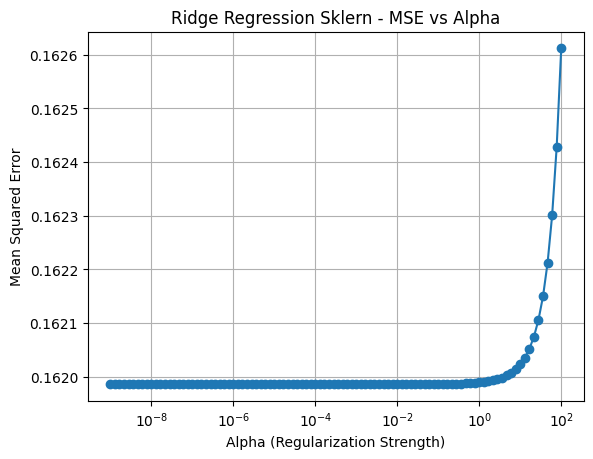

In [107]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

alphas = np.logspace(-9, 2, 100)

ridge = Ridge()

mse_values = []
r2_score_values = []

for alpha in alphas:
    ridge.alpha = alpha
    ridge.fit(x_train_L2_Sk, y_train)
    y_pred = ridge.predict(x_test_L2_Sk)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    r2 = r2_score(y_test, y_pred)
    r2_score_values.append(r2)

J_mse_L2 = min(mse_values)
R_square_L2 = r2_score_values[mse_values.index(min(mse_values))]

print('The Mean Square Error(MSE) or J(theta) is: ',min(mse_values))
print('R square obtain for normal equation method is :',r2_score_values[mse_values.index(min(mse_values))])

plt.plot(alphas, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Sklern - MSE vs Alpha')
plt.grid(True)
plt.show()

In [108]:
ridge_theta = [ridge.intercept_]+list(ridge.coef_)
parameter_df = parameter_df.join(pd.Series(ridge_theta, name='Sklearn_theta_L2'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta,theta_L2,Sklearn_theta_L2
0,theta_0,intersect:x_0=1,8.946610,8.946610,9.889652,9.889652
1,theta_1,Posted On,0.010147,0.010147,0.341824,0.009061
2,theta_2,Size,0.000493,0.000493,0.325652,0.301369
3,theta_3,Bathroom,0.278935,0.278935,0.242828,0.252012
4,theta_4,Total Floor,0.007205,0.007205,0.059546,0.077310
5,theta_5,OHE_Super Area,-0.059826,-0.059826,-0.001974,-0.033693
6,theta_6,OHE_Chennai,-0.013908,-0.013908,-0.033205,-0.011958
7,theta_7,OHE_Delhi,0.228627,0.228627,0.095269,0.065270
8,theta_8,OHE_Hyderabad,-0.157266,-0.157266,-0.096288,-0.065403
9,theta_9,OHE_Kolkata,-0.224044,-0.224044,-0.073158,-0.072820


# **Градиентный спуск**

In [109]:
scaler = StandardScaler()
x_train_b = scaler.fit_transform(x_train)
x_test_b = scaler.transform(x_test)

Theta: [[ 9.88965185e+00]
 [ 8.30893072e-03]
 [ 3.09019776e-01]
 [ 2.56800460e-01]
 [ 6.99128867e-02]
 [-2.93636452e-02]
 [-1.07157843e-02]
 [ 6.90448200e-02]
 [-6.64552413e-02]
 [-7.20334265e-02]
 [ 3.54053201e-01]
 [-7.43381856e-02]
 [-1.38929902e-02]
 [-3.35425699e-02]
 [-1.63805023e-01]]


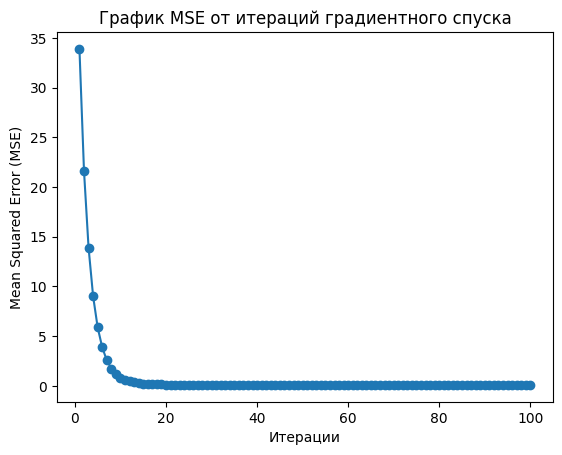

In [110]:
def gradient_descent(theta, X, y, learning_rate, num_iterations):
    m = len(y)
    cost_history = []  # Сохранение значений MSE на каждой итерации
    for _ in range(num_iterations):
        gradient = 2/X.shape[0] * X.T.dot(X.dot(theta) - y_train.values.reshape(-1, 1)) # рассчет градиента
        theta = theta - learning_rate * gradient
        cost = np.sum((X.dot(theta) - y.values.reshape(-1, 1))**2) / (2 * m)
        cost_history.append(cost)
    return theta, cost_history

# Добавляем столбец единиц для учёта свободного члена
x_train_b = np.c_[np.ones((x_train.shape[0], 1)), x_train_b]

# Инициализируем параметры и гиперпараметры
theta = np.random.randn(15, 1)
learning_rate = 0.1
num_iterations = 100

# Применяем градиентный спуск
theta, cost_history = gradient_descent(theta, x_train_b, y_train, learning_rate, num_iterations)

# Выводим обученные параметры и историю стоимости
print("Theta:", theta)

plt.plot(range(1, num_iterations + 1), cost_history, marker='o')
plt.xlabel('Итерации')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('График MSE от итераций градиентного спуска')
plt.show()

In [111]:
theta_list = theta.flatten()
print(theta_list)

[ 9.88965185e+00  8.30893072e-03  3.09019776e-01  2.56800460e-01
  6.99128867e-02 -2.93636452e-02 -1.07157843e-02  6.90448200e-02
 -6.64552413e-02 -7.20334265e-02  3.54053201e-01 -7.43381856e-02
 -1.38929902e-02 -3.35425699e-02 -1.63805023e-01]


In [112]:
x_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test_b]

In [113]:
# Normal equation
y_pred_norm =  np.matmul(x_test_b, theta_list)

#Evaluvation: MSE
J_mse_grad = np.sum((y_pred_norm - y_test)**2)/ x_test_b.shape[0]

# R_square
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square_grad = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_grad)
print('R square obtain for normal equation method is :',R_square_grad)

The Mean Square Error(MSE) or J(theta) is:  0.16218838584936912
R square obtain for normal equation method is : 0.8089200377350895


# **Ответы на вопросы**
1. Какие признаки оказывают наибольший вклад в точность определения
стоимости аренды? Предложить способы отбора наиболее важных признаков

Наиболее влиятельными оказались признаки того, что локация в городе Мумбай и контакт для связи. Это было определено по величине весов признака.

In [114]:
parameter_sorted = parameter_df
parameter_sorted['theta_abs'] = parameter_sorted['theta'].abs()

parameter_sorted = parameter_df.sort_values(by='theta_abs', ascending=False)
parameter_sorted = parameter_sorted.drop(columns=['theta_abs'])
print(parameter_sorted)

   Parameter               Columns     theta  Sklearn_theta  theta_L2  \
0    theta_0       intersect:x_0=1  8.946610       8.946610  9.889652   
10  theta_10            OHE_Mumbai  0.896541       0.896541  0.370601   
14  theta_14     OHE_Contact Owner -0.346001      -0.346001 -0.081036   
3    theta_3              Bathroom  0.278935       0.278935  0.242828   
7    theta_7             OHE_Delhi  0.228627       0.228627  0.095269   
9    theta_9           OHE_Kolkata -0.224044      -0.224044 -0.073158   
8    theta_8         OHE_Hyderabad -0.157266      -0.157266 -0.096288   
11  theta_11       OHE_Unfurnished -0.155213      -0.155213 -0.054229   
13  theta_13            OHE_Family -0.114265      -0.114265 -0.041750   
5    theta_5        OHE_Super Area -0.059826      -0.059826 -0.001974   
12  theta_12  OHE_Bachelors/Family -0.031116      -0.031116 -0.000963   
6    theta_6           OHE_Chennai -0.013908      -0.013908 -0.033205   
1    theta_1             Posted On  0.010147       

2. Какая модель имеет наименьшее значение функции потерь на тестовой
выборке? Помогает ли регуляризация избежать эффекта переобучения в
данном примере?

Модели имеют практически идетичные показатели функции потерь на тестовой выборке. Регуляризация в данном случае не помогла в избежании переобучения.

In [116]:
print("Значение MSE для линейной регрессии без регуляризации (ручной метод):", J_mse_hndl)
print("Значение MSE для линейной регрессии без регуляризации (sklearn):", J_mse)
print("Значение MSE для линейной регрессии с L2-регуляризацией (ручной метод):", J_mse_hndl_L2)
print("Значение MSE для линейной регрессии с L2-регуляризацией (sklearn):", J_mse_L2)
print("Значение MSE градиентного спуска:", J_mse_grad)

Значение MSE для линейной регрессии без регуляризации (ручной метод): 0.16198554782306776
Значение MSE для линейной регрессии без регуляризации (sklearn): 0.254466662095026
Значение MSE для линейной регрессии с L2-регуляризацией (ручной метод): 0.16197530639412439
Значение MSE для линейной регрессии с L2-регуляризацией (sklearn): 0.16198554782307034
Значение MSE градиентного спуска: 0.16218838584936912
